# Taxi Fare Prediction

## Problem Statement
This case study is to predict the taxi fare for a taxi ride in New York City from a given pickup point to the agreed dropoff location. Decision tree and Random Forest regressor is used for the fare prediction.

## Data Definition

**unique_id**: Unique identifier or key for each record in the dataset - (string)    

**date_time_of_pickup**: time when the ride started - (timestamp)

**longitude_of_pickup**: Longitude of the taxi ride pickup point - (float) - (Numerical) 
 
**latitude_of_pickup**: Latitude of the taxi ride pickup point - (float) - (Numerical)
    
**longitude__of_dropoff**: Longitude of the taxi ride dropoff point  - (float) - (Numerical)
    
**latitude_of_dropoff**: Latitude of the taxi ride dropoff point - (float) - (Numerical)
    
**no_of_passenger**: count of the passengers during the ride - (integer) - (Numerical)
    
**amount**: (target variable)dollar amount of the cost of the taxi ride
   

## Exploratory Data Analysis and Data Preparation

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from warnings import filterwarnings
filterwarnings("ignore")
from math import radians, sin, cos, asin, sqrt
from sklearn import tree
import graphviz
from IPython.display import Image

In [2]:
pd.options.display.max_columns = None
df = pd.read_csv("Project 5 - Random Forest/Dataset/TaxiFare.csv")
df

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
...,...,...,...,...,...,...,...,...
49995,25:15.0,15.0,2013-06-12 23:25:15 UTC,-73.999973,40.748531,-74.016899,40.705993,1
49996,19:18.0,7.5,2015-06-22 17:19:18 UTC,-73.984756,40.768211,-73.987366,40.760597,1
49997,53:00.0,6.9,2011-01-30 04:53:00 UTC,-74.002698,40.739428,-73.998108,40.759483,1
49998,09:00.0,4.5,2012-11-06 07:09:00 UTC,-73.946062,40.777567,-73.953450,40.779687,2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             50000 non-null  object 
 1   amount                50000 non-null  float64
 2   date_time_of_pickup   50000 non-null  object 
 3   longitude_of_pickup   50000 non-null  float64
 4   latitude_of_pickup    50000 non-null  float64
 5   longitude_of_dropoff  50000 non-null  float64
 6   latitude_of_dropoff   50000 non-null  float64
 7   no_of_passenger       50000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.1+ MB


In [4]:
df.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992062,40.734880,-73.991152,40.734371,1.000000
50%,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000


In [5]:
df.drop("unique_id", axis = 1, inplace = True)
df

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
...,...,...,...,...,...,...,...
49995,15.0,2013-06-12 23:25:15 UTC,-73.999973,40.748531,-74.016899,40.705993,1
49996,7.5,2015-06-22 17:19:18 UTC,-73.984756,40.768211,-73.987366,40.760597,1
49997,6.9,2011-01-30 04:53:00 UTC,-74.002698,40.739428,-73.998108,40.759483,1
49998,4.5,2012-11-06 07:09:00 UTC,-73.946062,40.777567,-73.953450,40.779687,2


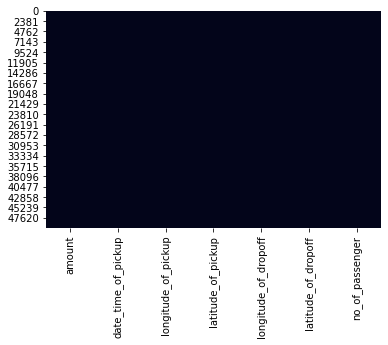

In [6]:
sns.heatmap(df.isnull(), vmin = 0 ,  vmax = 1, cbar = False)
plt.show()

In [7]:
df.date_time_of_pickup = pd.to_datetime(df.date_time_of_pickup)

In [8]:
df = df.assign(hour = df.date_time_of_pickup.dt.hour,
         day = df.date_time_of_pickup.dt.day,
         month = df.date_time_of_pickup.dt.month,
         year = df.date_time_of_pickup.dt.year,
         day_of_week = df.date_time_of_pickup.dt.dayofweek)
df.drop("date_time_of_pickup", axis = 1, inplace= True)

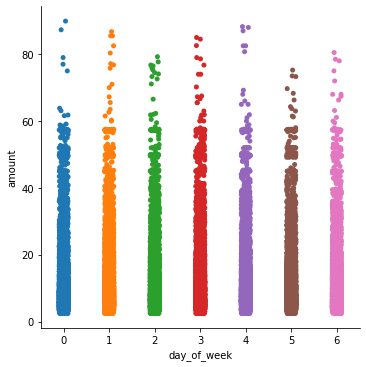

In [31]:
sns.catplot(x = "day_of_week", y ="amount", data = df)

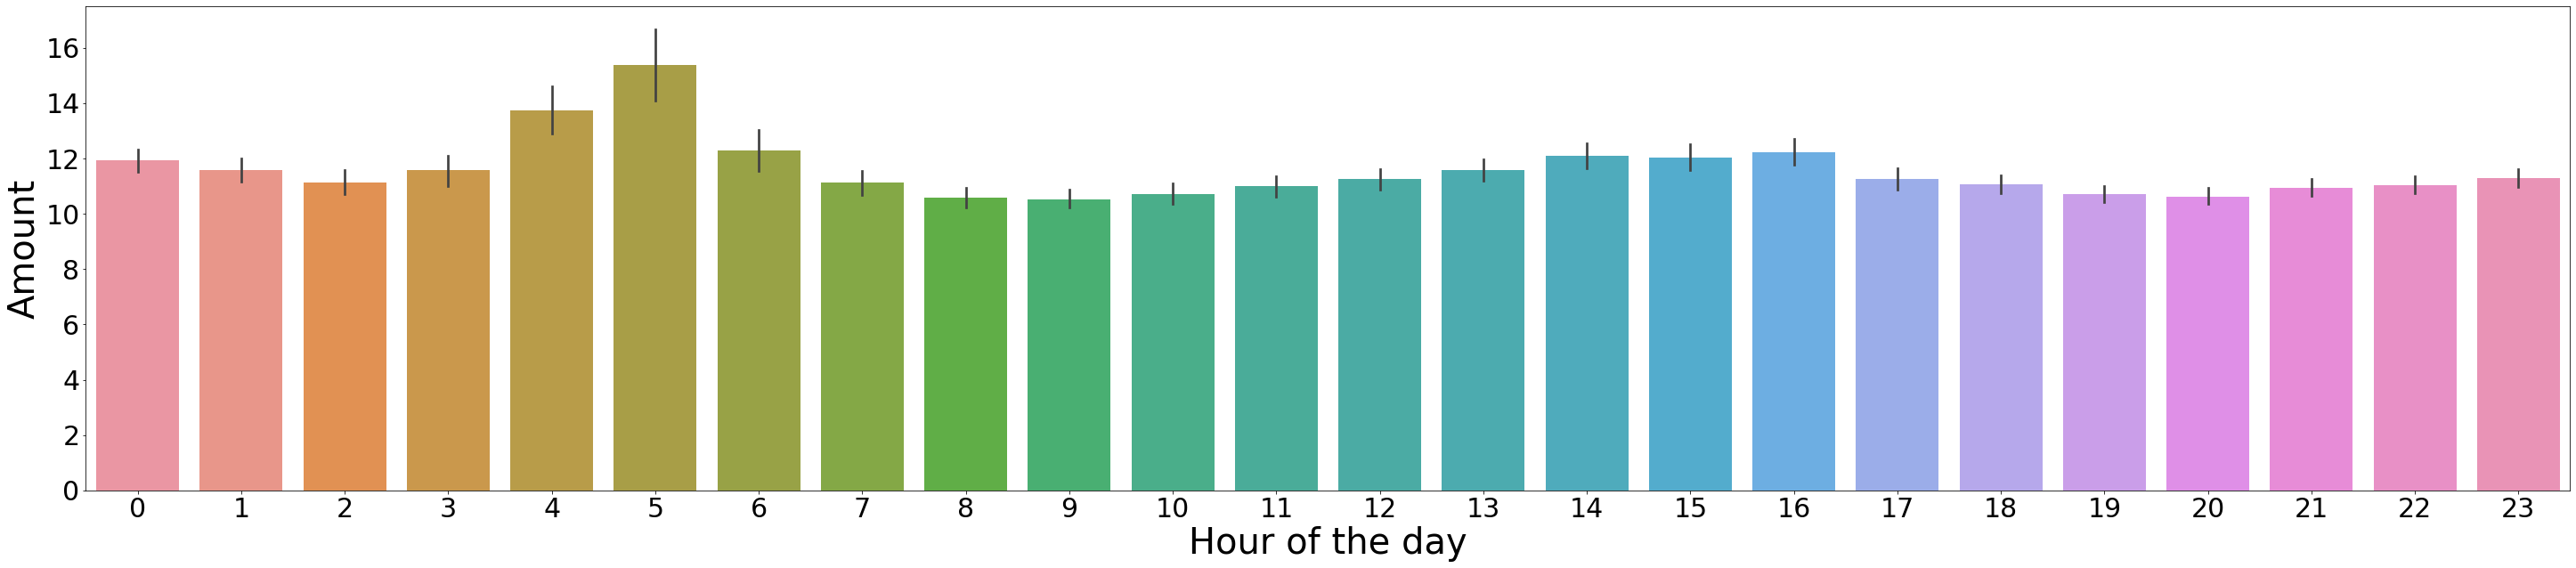

In [44]:
ax, fig =plt.subplots(figsize = (50,10))
res = sns.barplot(x=df.hour, y= df.amount)
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
plt.xlabel("Hour of the day", fontsize = 40)
plt.ylabel("Amount", fontsize = 40)
plt.show()

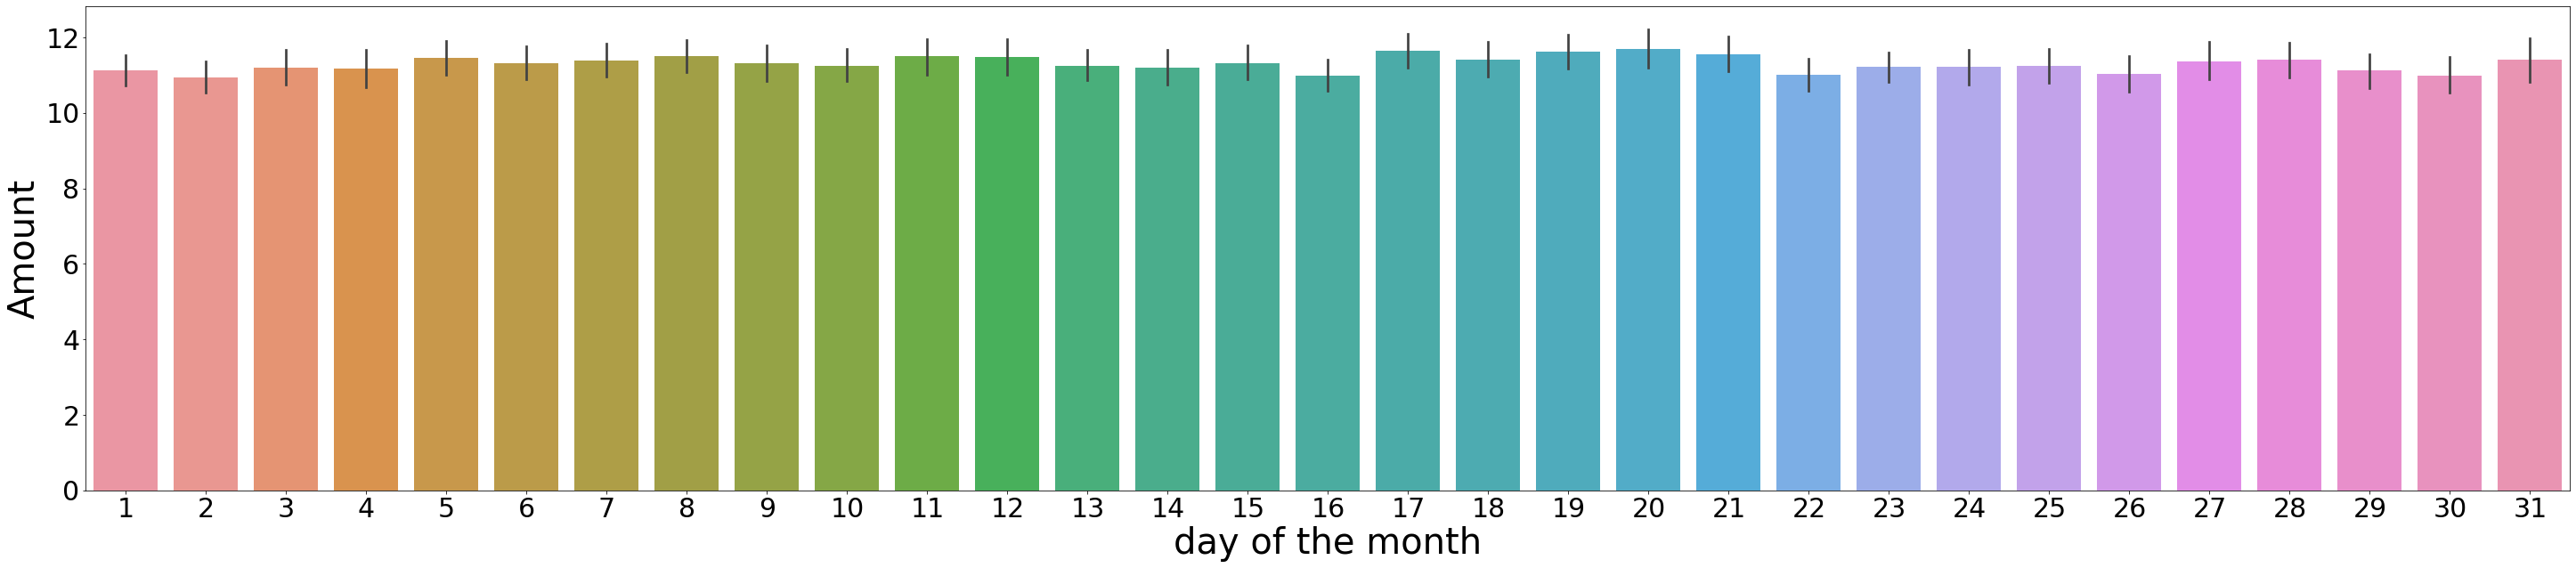

In [45]:
ax, fig =plt.subplots(figsize = (50,10))
res = sns.barplot(x=df.day, y= df.amount)
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
plt.xlabel("day of the month", fontsize = 40)
plt.ylabel("Amount", fontsize = 40)
plt.show()

In [10]:
def distance_transform(longitude1, latitude1, longitude2, latitude2):
    travel_dist = []
    
    for pos in range(len(longitude1)):
        long1,lati1,long2,lati2 = map(radians,[longitude1[pos],latitude1[pos],longitude2[pos],latitude2[pos]])
        dist_long = long2 - long1
        dist_lati = lati2 - lati1
        a = sin(dist_lati/2)**2 + cos(lati1) * cos(lati2) * sin(dist_long/2)**2
        c = 2 * asin(sqrt(a))*6371
        travel_dist.append(c)
       
    return travel_dist

In [11]:
df['travel_dist_km'] = distance_transform(df['longitude_of_pickup'].to_numpy(),
                                                df['latitude_of_pickup'].to_numpy(),
                                                df['longitude_of_dropoff'].to_numpy(),
                                                df['latitude_of_dropoff'].to_numpy()
                                              )

In [12]:
df.head()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,hour,day,month,year,day_of_week,travel_dist_km
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,17,15,6,2009,0,1.030764
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,16,5,1,2010,1,8.450134
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,0,18,8,2011,3,1.389525
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,4,21,4,2012,5,2.799270
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,7,9,3,2010,1,1.999157


In [13]:
df.amount[df.amount<0].sort_values()

42337   -5.0
13032   -3.0
2039    -2.9
2486    -2.5
28839   -2.5
36722   -2.5
Name: amount, dtype: float64

In [14]:
df.amount[df.amount>=0].sort_values()

27891      0.00
47302      0.00
10002      0.00
2780       0.01
25551      2.50
          ...  
46198    160.00
1483     165.00
43956    165.00
1335     180.00
28373    200.00
Name: amount, Length: 49994, dtype: float64

In [15]:
df = df[df.amount>= 2.5]
df

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,hour,day,month,year,day_of_week,travel_dist_km
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,17,15,6,2009,0,1.030764
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,16,5,1,2010,1,8.450134
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,0,18,8,2011,3,1.389525
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,4,21,4,2012,5,2.799270
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,7,9,3,2010,1,1.999157
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,15.0,-73.999973,40.748531,-74.016899,40.705993,1,23,12,6,2013,2,4.940374
49996,7.5,-73.984756,40.768211,-73.987366,40.760597,1,17,22,6,2015,0,0.874706
49997,6.9,-74.002698,40.739428,-73.998108,40.759483,1,4,30,1,2011,6,2.263286
49998,4.5,-73.946062,40.777567,-73.953450,40.779687,2,7,6,11,2012,1,0.665245


In [16]:
df.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,hour,day,month,year,day_of_week,travel_dist_km
count,49990.000000,49990.000000,49990.000000,49990.000000,49990.000000,49990.000000,49990.000000,49990.000000,49990.000000,49990.000000,49990.000000,49990.000000
mean,11.366813,-72.509468,39.933598,-72.505803,39.926903,1.667914,13.488918,15.671974,6.273675,2011.738988,3.029966,18.339565
std,9.684697,10.394880,6.225469,10.403539,6.012677,1.289250,6.507130,8.660751,3.461285,1.862474,1.956912,353.499196
min,2.500000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000,0.000000,1.000000,1.000000,2009.000000,0.000000,0.000000
25%,6.000000,-73.992062,40.734883,-73.991152,40.734375,1.000000,9.000000,8.000000,3.000000,2010.000000,1.000000,1.223567
50%,8.500000,-73.981840,40.752679,-73.980082,40.753373,1.000000,14.000000,16.000000,6.000000,2012.000000,3.000000,2.120239
75%,12.500000,-73.967155,40.767360,-73.963588,40.768166,2.000000,19.000000,23.000000,9.000000,2013.000000,5.000000,3.895859
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000,23.000000,31.000000,12.000000,2015.000000,6.000000,8667.818812


In [17]:
df = df[df.latitude_of_pickup <=90]
df.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,hour,day,month,year,day_of_week,travel_dist_km
count,49989.000000,49989.000000,49989.000000,49989.000000,49989.000000,49989.000000,49989.000000,49989.000000,49989.000000,49989.000000,49989.000000,49989.000000
mean,11.366974,-72.509440,39.926374,-72.505775,39.926886,1.667927,13.488968,15.671688,6.273660,2011.739003,3.029927,18.339254
std,9.684727,10.394982,6.012319,10.403641,6.012736,1.289260,6.507186,8.660600,3.461318,1.862490,1.956912,353.502725
min,2.500000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000,0.000000,1.000000,1.000000,2009.000000,0.000000,0.000000
25%,6.000000,-73.992062,40.734882,-73.991152,40.734375,1.000000,9.000000,8.000000,3.000000,2010.000000,1.000000,1.223542
50%,8.500000,-73.981840,40.752679,-73.980083,40.753372,1.000000,14.000000,16.000000,6.000000,2012.000000,3.000000,2.120232
75%,12.500000,-73.967155,40.767359,-73.963592,40.768165,2.000000,19.000000,23.000000,9.000000,2013.000000,5.000000,3.895837
max,200.000000,40.783472,43.098708,40.851027,43.415190,6.000000,23.000000,31.000000,12.000000,2015.000000,6.000000,8667.818812


<AxesSubplot:>

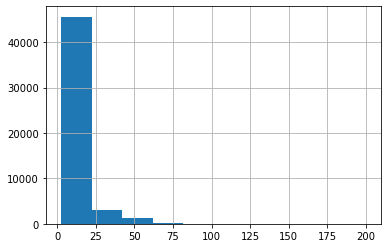

In [18]:
df.amount.hist()

In [19]:
df[df.amount>90].count()

amount                  27
longitude_of_pickup     27
latitude_of_pickup      27
longitude_of_dropoff    27
latitude_of_dropoff     27
no_of_passenger         27
hour                    27
day                     27
month                   27
year                    27
day_of_week             27
travel_dist_km          27
dtype: int64

In [20]:
df = df[df.amount<90]
df

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,hour,day,month,year,day_of_week,travel_dist_km
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,17,15,6,2009,0,1.030764
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,16,5,1,2010,1,8.450134
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,0,18,8,2011,3,1.389525
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,4,21,4,2012,5,2.799270
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,7,9,3,2010,1,1.999157
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,15.0,-73.999973,40.748531,-74.016899,40.705993,1,23,12,6,2013,2,4.940374
49996,7.5,-73.984756,40.768211,-73.987366,40.760597,1,17,22,6,2015,0,0.874706
49997,6.9,-74.002698,40.739428,-73.998108,40.759483,1,4,30,1,2011,6,2.263286
49998,4.5,-73.946062,40.777567,-73.953450,40.779687,2,7,6,11,2012,1,0.665245


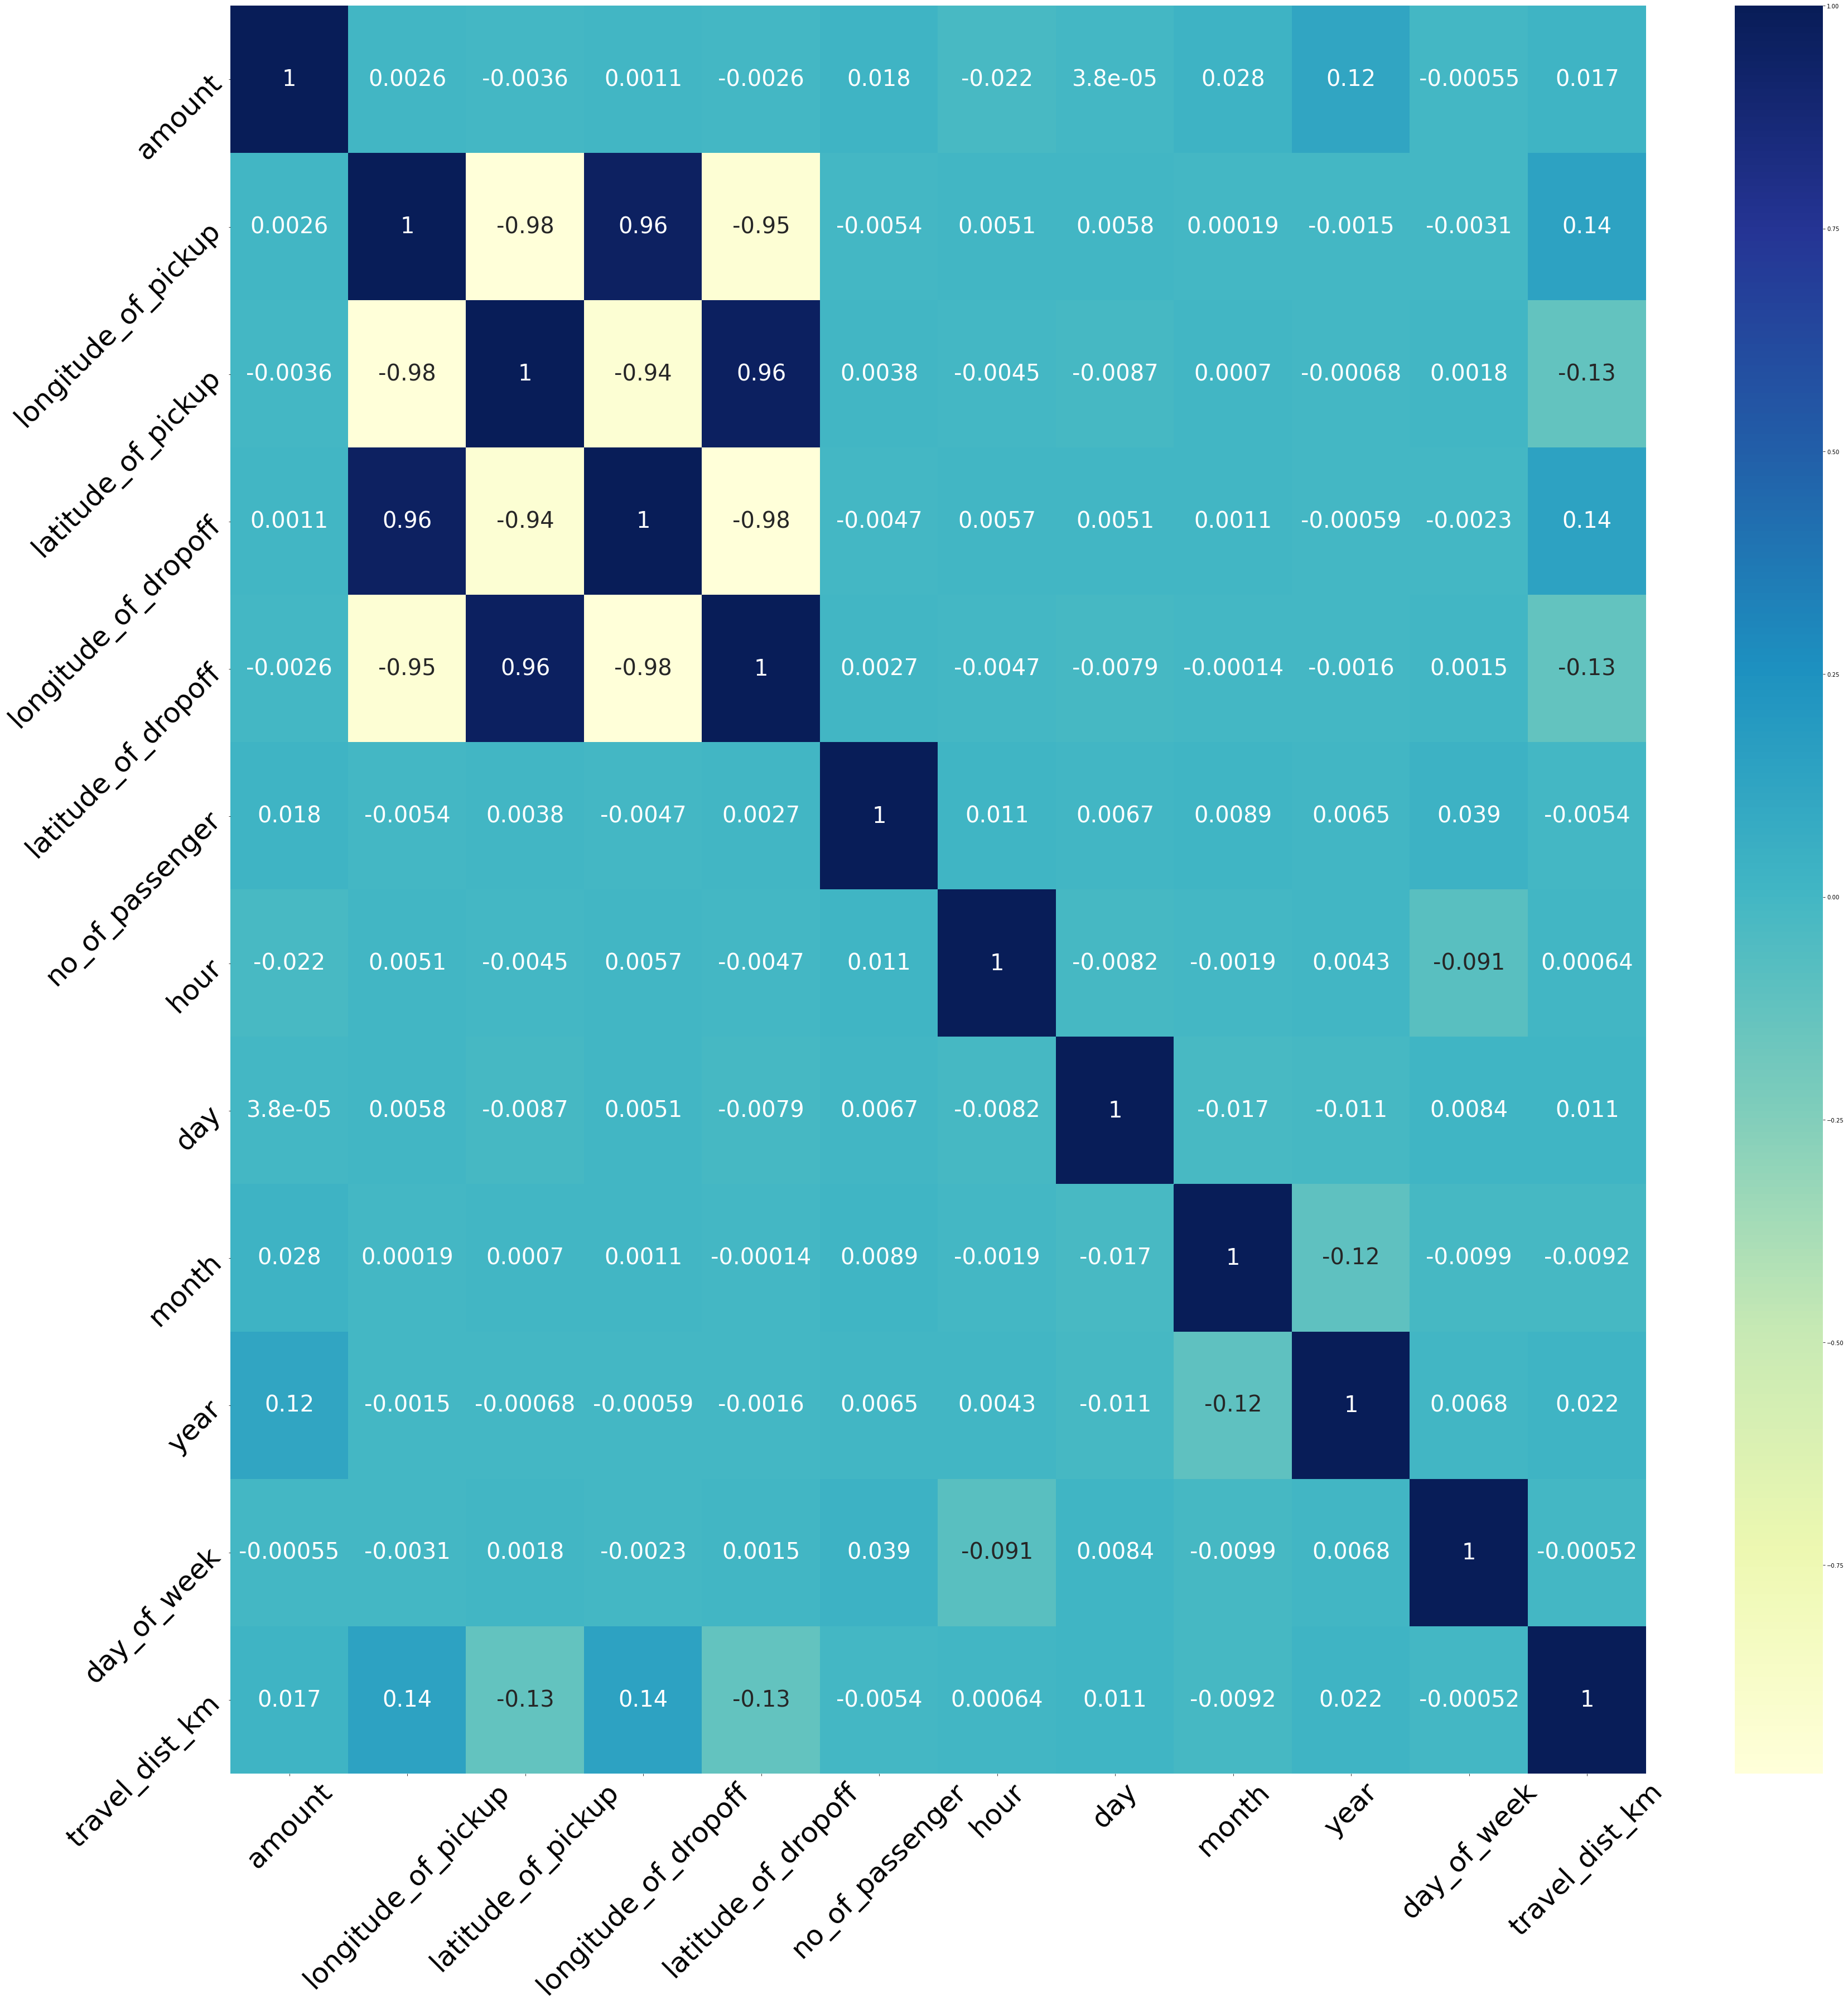

In [21]:
ax, fig = plt.subplots(figsize = (50,50))
sns.heatmap(data = df.corr(), annot =True, annot_kws = {"size": 40}, cmap ="YlGnBu")
plt.xticks(fontsize = 50, rotation =45)
plt.yticks(fontsize = 50, rotation =45)
plt.tight_layout()
plt.show()

## Model Building

In [22]:
X = df.drop("amount", axis = 1) 
Y = df.amount
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3, random_state = 10)

In [23]:
lin_reg_model = sm.OLS(y_train, x_train).fit()
print(lin_reg_model.summary())
y_pred_lin_reg = lin_reg_model.predict(x_test)

                                 OLS Regression Results                                
Dep. Variable:                 amount   R-squared (uncentered):                   0.597
Model:                            OLS   Adj. R-squared (uncentered):              0.597
Method:                 Least Squares   F-statistic:                              4704.
Date:                Wed, 22 Sep 2021   Prob (F-statistic):                        0.00
Time:                        13:01:53   Log-Likelihood:                     -1.2754e+05
No. Observations:               34973   AIC:                                  2.551e+05
Df Residuals:                   34962   BIC:                                  2.552e+05
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [24]:
sgd = SGDRegressor(random_state = 10)
sgd_model = sgd.fit(x_train,y_train)
y_pred_sgd = sgd_model.predict(x_test)

In [25]:
dt = DecisionTreeRegressor(max_depth = 7, max_leaf_nodes= 30)
dt_model = dt.fit(x_train,y_train)
y_pred_dt = dt_model.predict(x_test)

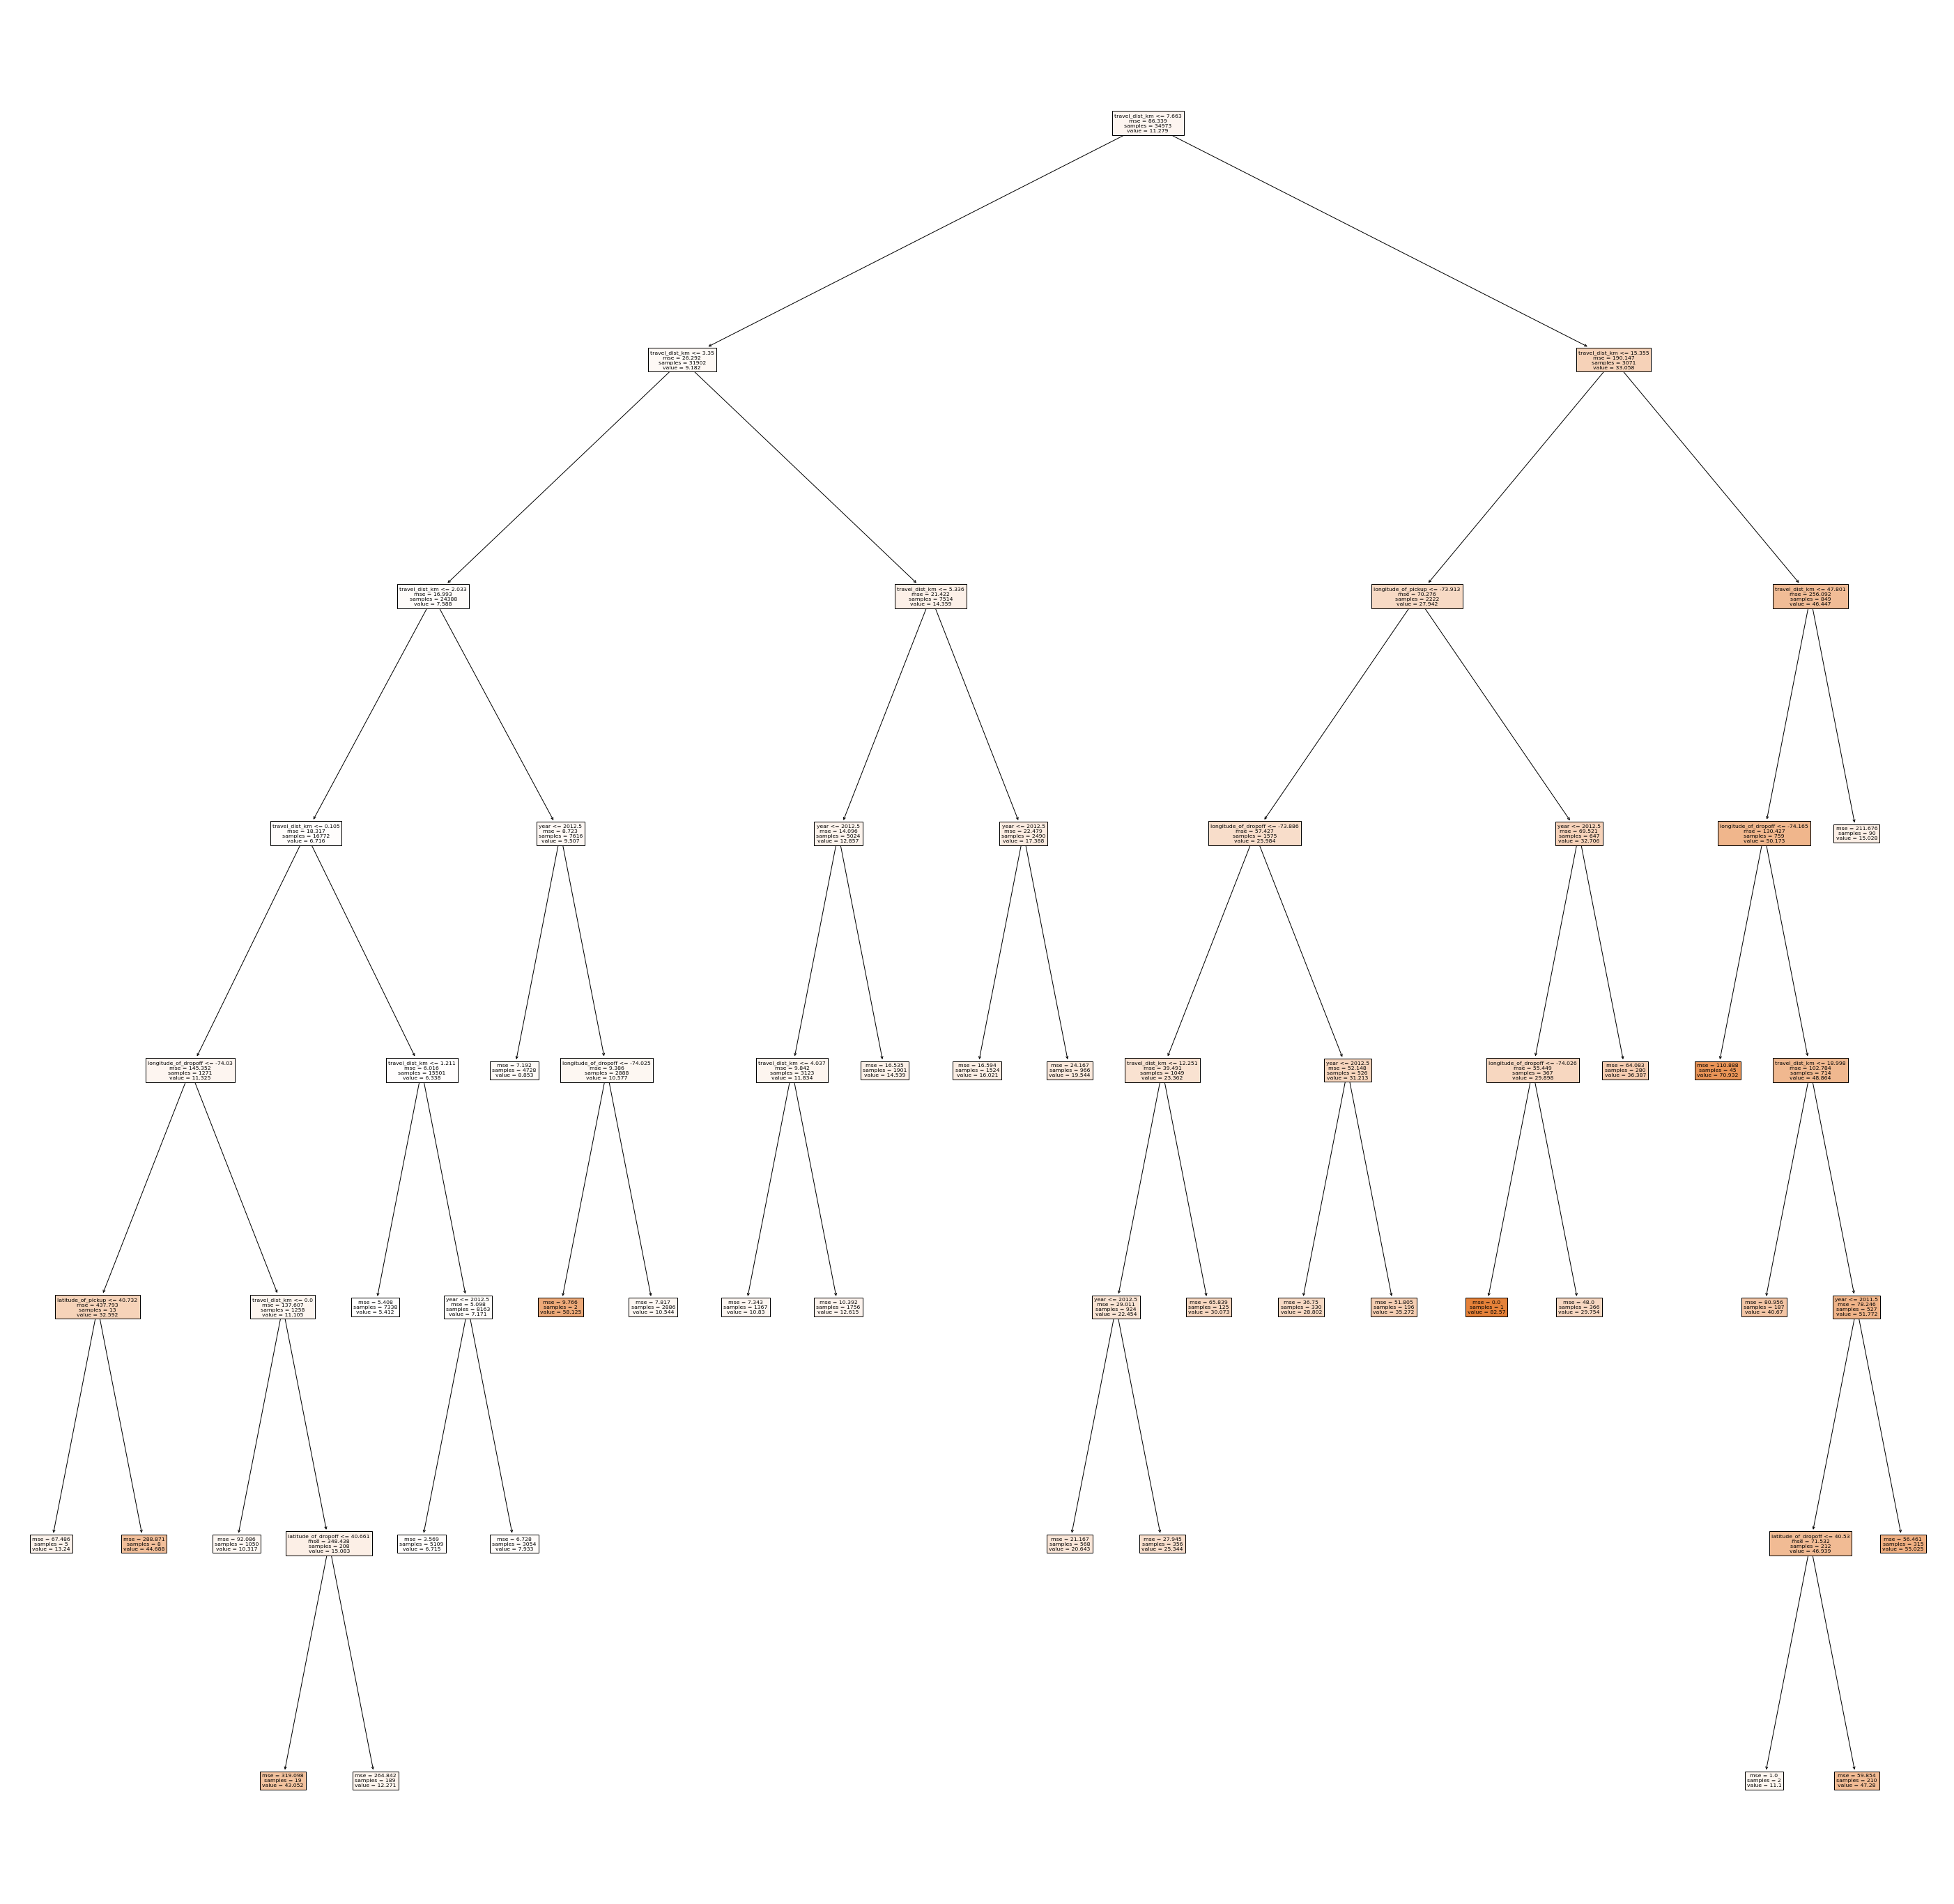

In [50]:
fig = plt.figure(figsize = (50,50))
_ = tree.plot_tree(dt_model,feature_names= x_train.columns, filled = True)

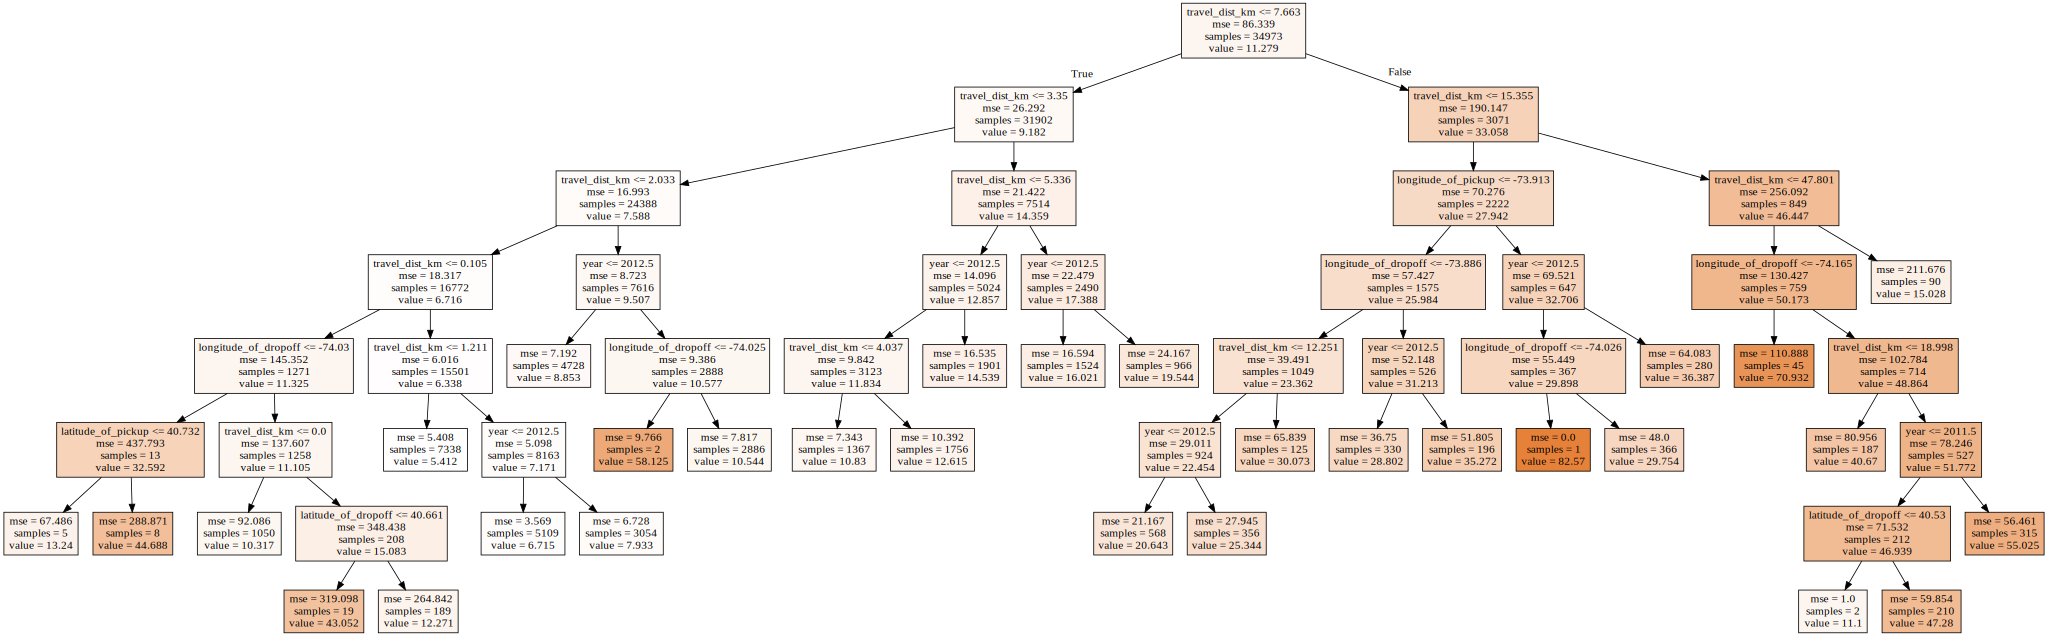

In [27]:
dot_data = tree.export_graphviz(dt_model, filled =True, feature_names = x_train.columns)
graph = graphviz.Source(dot_data, format = "png")
graph

In [47]:
tuned_parameters_dt = {"max_depth":[3,5,7,9,10],
                   "max_leaf_nodes":[15,20,25,30,35]}
dt_est = DecisionTreeRegressor(random_state = 10)
grid_tree = GridSearchCV(dt_est,param_grid = tuned_parameters_dt, cv= 10)
dt_grid = grid_tree.fit(x_train, y_train)

In [54]:
print("Hyper Parameters:", dt_grid.best_params_)

Hyper Parameters: {'max_depth': 7, 'max_leaf_nodes': 35}


In [49]:
dt_gscv = DecisionTreeRegressor(max_depth = dt_grid.best_params_.get("max_depth"),
                                max_leaf_nodes= dt_grid.best_params_.get("max_leaf_nodes"))
dt_gscv_model = dt_gscv.fit(x_train,y_train)
y_pred_dt_gscv = dt_gscv_model.predict(x_test)

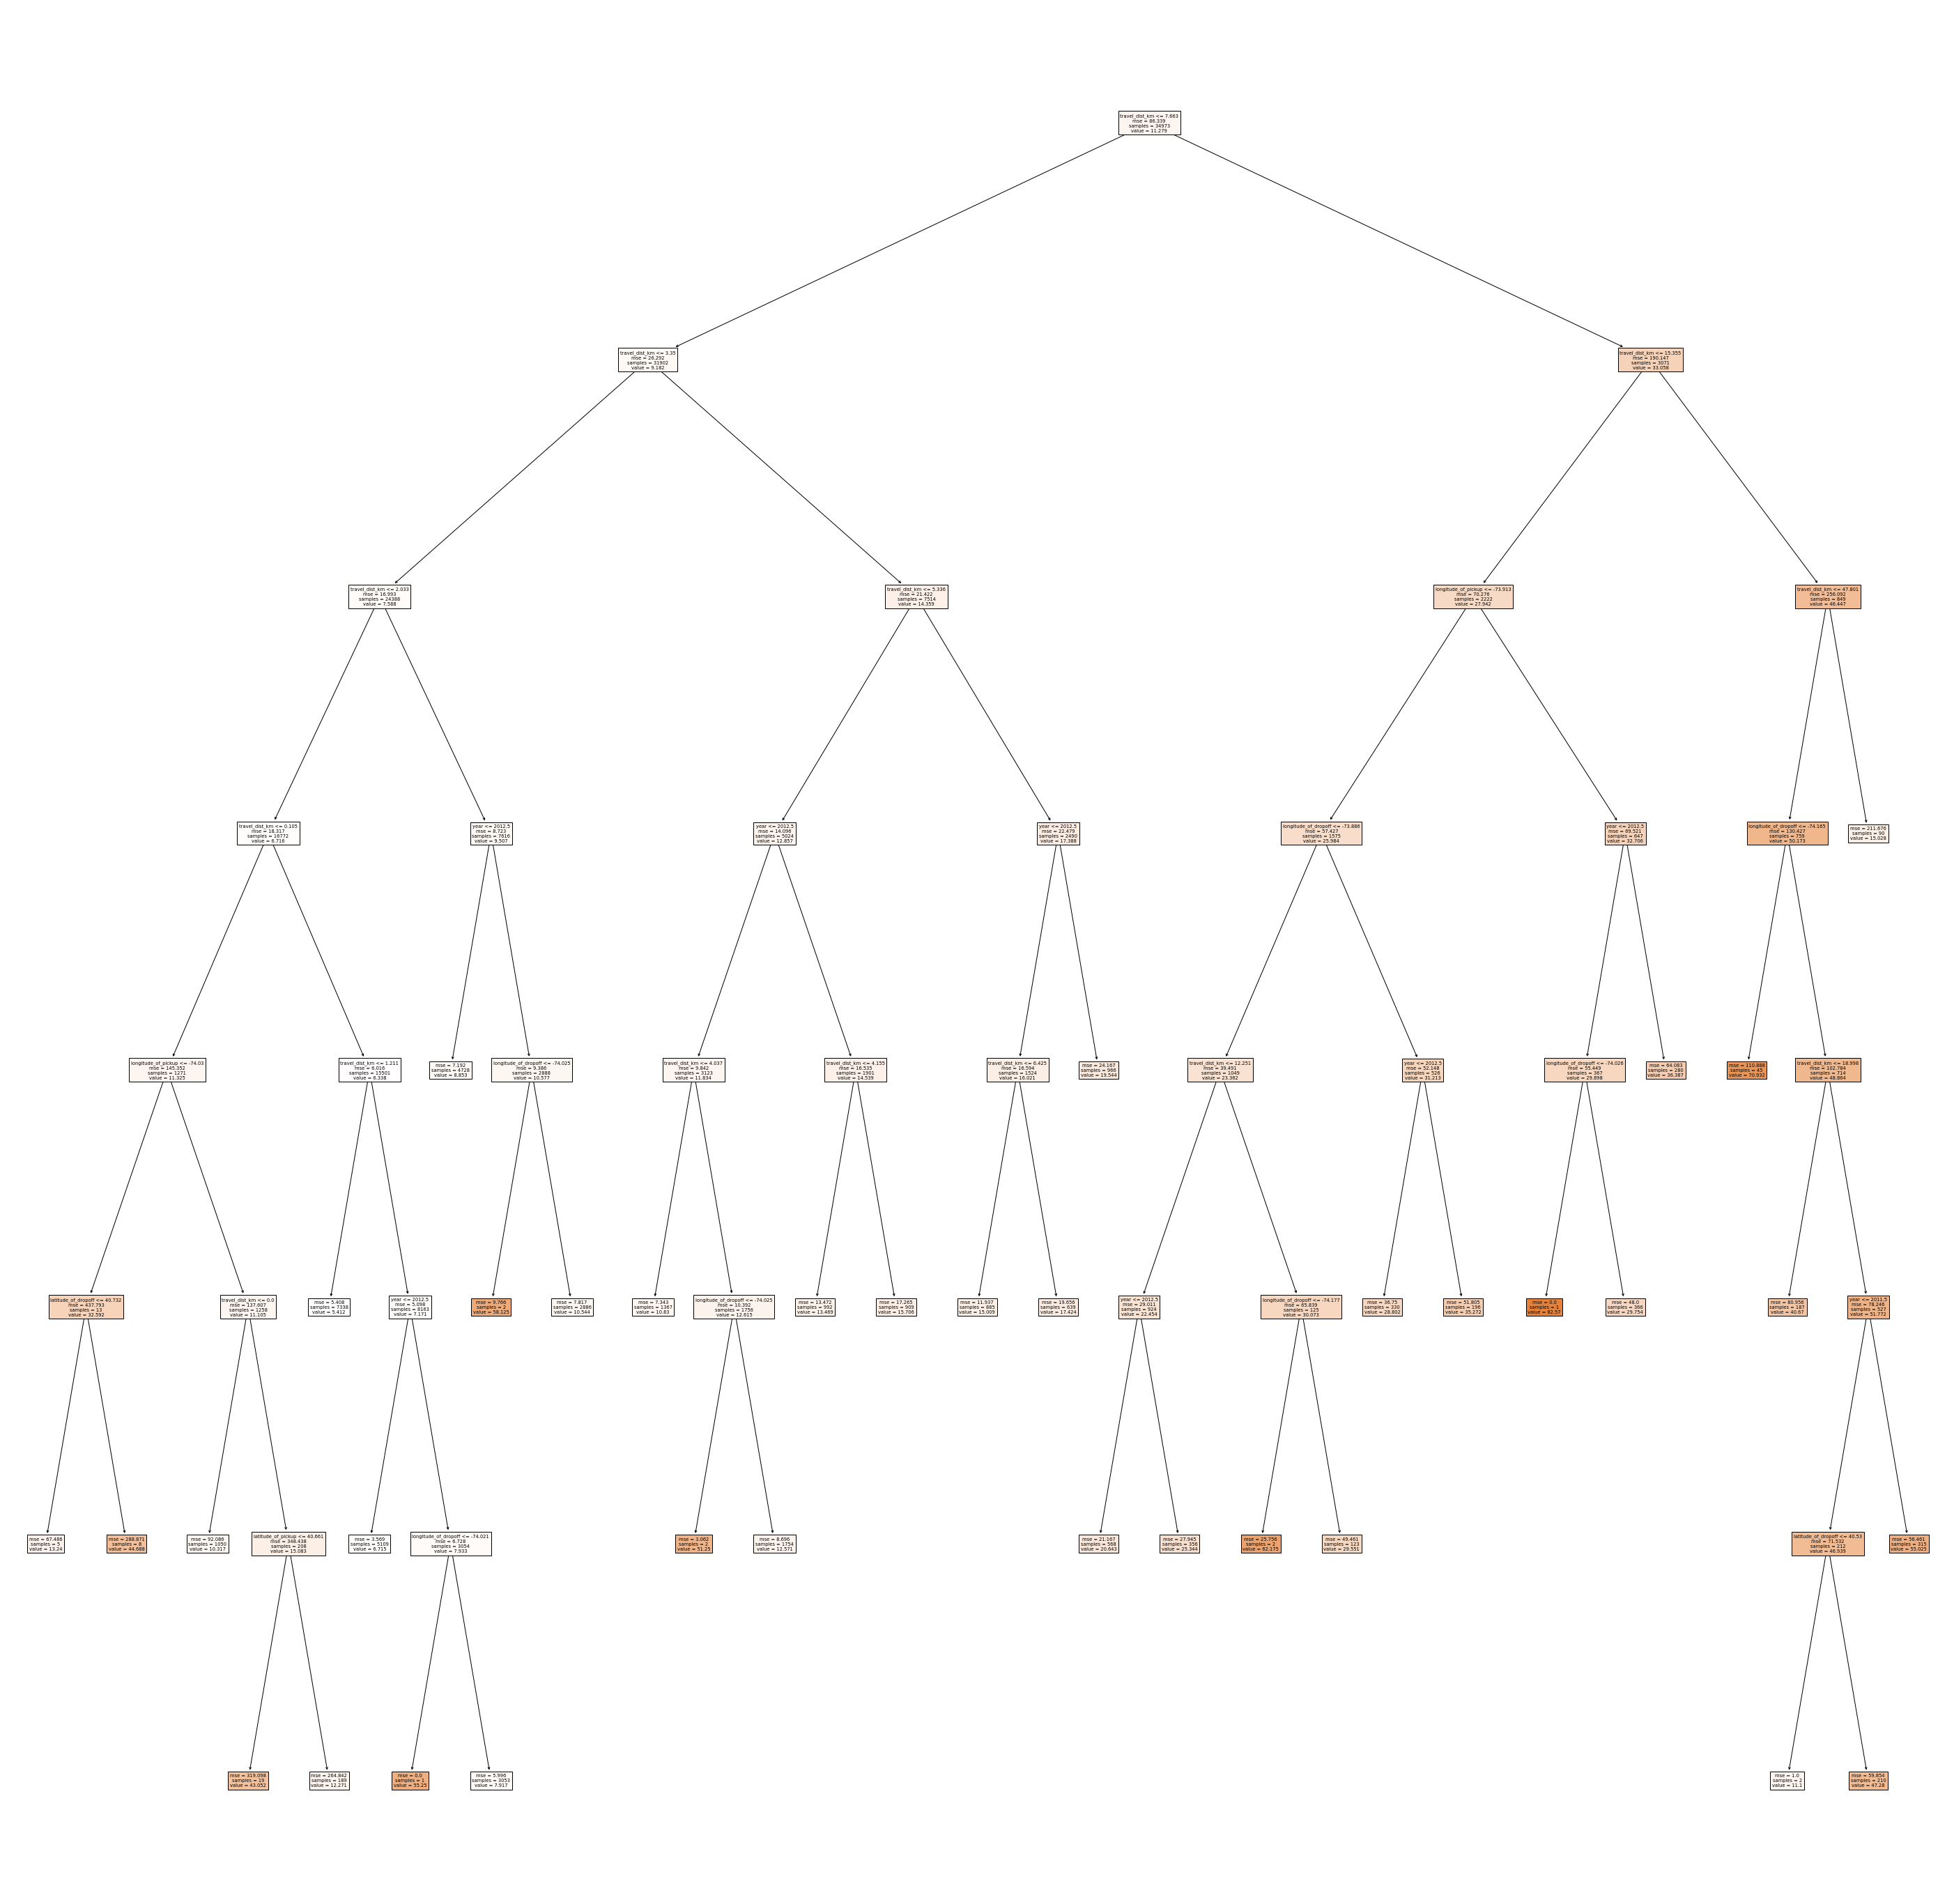

In [51]:
fig = plt.figure(figsize = (50,50))
_ = tree.plot_tree(dt_gscv_model,feature_names= x_train.columns, filled = True)

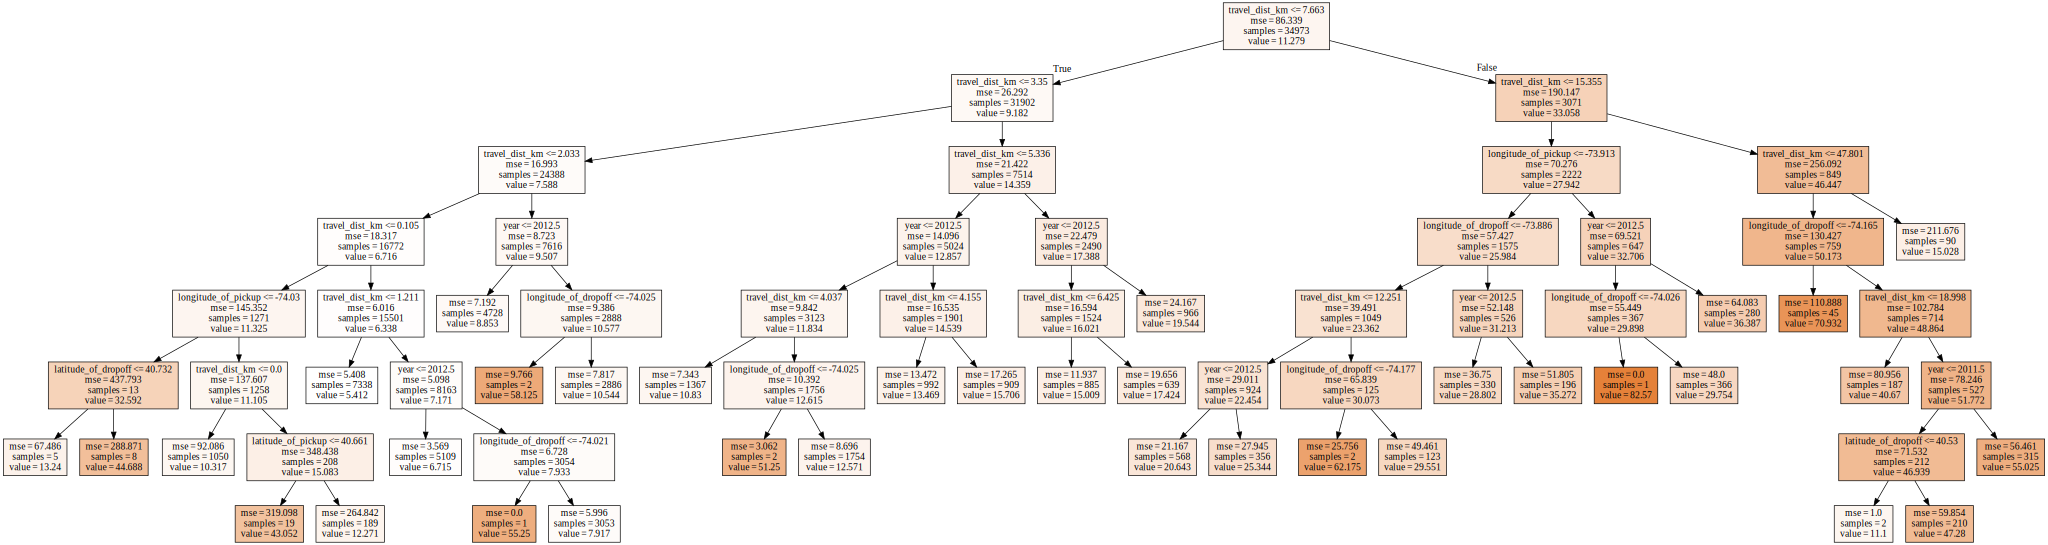

In [52]:
dot_data = tree.export_graphviz(dt_gscv_model, filled =True, feature_names = x_train.columns)
graph = graphviz.Source(dot_data, format = "png")
graph

In [28]:
rf = RandomForestRegressor(max_depth = 7, max_leaf_nodes= 30, n_estimators = 100)
rf_model = rf.fit(x_train,y_train)
y_pred_rf = rf_model.predict(x_test)

In [55]:
tuned_parameters_rf = {"n_estimators":[80,100,120],
                       "max_depth":[3,5,7,9,10],
                   "max_leaf_nodes":[15,20,25,30,35]}
rf_est = RandomForestRegressor(random_state = 10)
grid_tree = GridSearchCV(rf_est,param_grid = tuned_parameters_rf, cv= 10)
rf_grid = grid_tree.fit(x_train, y_train)

In [56]:
print("Hyper paramters:", rf_grid.best_params_)

Hyper paramters: {'max_depth': 7, 'max_leaf_nodes': 35, 'n_estimators': 80}


In [58]:
rf_gscv = RandomForestRegressor(max_depth = rf_grid.best_params_.get("max_depth"),
                           max_leaf_nodes= rf_grid.best_params_.get("max_leaf_nodes"),
                           n_estimators = rf_grid.best_params_.get("n_estimators"))
rf_gscv_model = rf_gscv.fit(x_train,y_train)
y_pred_rf_gscv = rf_gscv_model.predict(x_test)

## Results

In [61]:
pd.DataFrame({"Model Name":["OLS Model", "SGD Model", "Decision Tree Model",
                           "Optimised Decision Tree Model","Random Forest Model",
                           "Optimised Random Forest Model"],
             "R-Squared":[lin_reg_model.rsquared, sgd.score(x_train,y_train),
                          dt.score(x_train,y_train),dt_gscv.score(x_train,y_train),
                          rf.score(x_train,y_train), rf_gscv.score(x_train,y_train)],
             "RMSE":[sqrt(mean_squared_error(y_test,y_pred_lin_reg)),sqrt(mean_squared_error(y_test,y_pred_sgd)),
                    sqrt(mean_squared_error(y_test,y_pred_dt)),sqrt(mean_squared_error(y_test,y_pred_dt_gscv)),
                    sqrt(mean_squared_error(y_test,y_pred_rf)),sqrt(mean_squared_error(y_test,y_pred_rf_gscv))]})

,Model Name,R-Squared,RMSE
0,OLS Model,5.967709e-01,9.366270e+00
1,SGD Model,-5.634961e+27,6.809667e+14
2,Decision Tree Model,8.157355e-01,4.402736e+00
3,Optimised Decision Tree Model,8.196639e-01,4.356281e+00
4,Random Forest Model,8.234633e-01,4.261159e+00
5,Optimised Random Forest Model,8.285366e-01,4.242254e+00


In [63]:
#Removing SGD model since it results low rsquared value and very high rmse value
pd.DataFrame({"Model Name":["OLS Model", "Decision Tree Model",
                           "Optimised Decision Tree Model","Random Forest Model",
                           "Optimised Random Forest Model"],
             "R-Squared":[lin_reg_model.rsquared, 
                          dt.score(x_train,y_train),dt_gscv.score(x_train,y_train),
                          rf.score(x_train,y_train), rf_gscv.score(x_train,y_train)],
             "RMSE":[sqrt(mean_squared_error(y_test,y_pred_lin_reg)),
                    sqrt(mean_squared_error(y_test,y_pred_dt)),sqrt(mean_squared_error(y_test,y_pred_dt_gscv)),
                    sqrt(mean_squared_error(y_test,y_pred_rf)),sqrt(mean_squared_error(y_test,y_pred_rf_gscv))]})

,Model Name,R-Squared,RMSE
0,OLS Model,0.596771,9.366270
1,Decision Tree Model,0.815735,4.402736
2,Optimised Decision Tree Model,0.819664,4.356281
3,Random Forest Model,0.823463,4.261159
4,Optimised Random Forest Model,0.828537,4.242254
